# This notebook contains a convolutional neural network that can be used to differentiate the images of healthy lungs and those with pneumonia. This project was created in January 2020. as I catched COVID-19 Pneumonia. The highest (not overfit) accuracy score of the model on the test set was 80.3% and you can see the last cell of the notebook if you want to try and replicate the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 
import pandas as pd
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7050000088188855427
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5077532672
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4884245391574324242
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:06:00.0, compute capability: 6.1"
]


In [4]:
X = np.load("X_pneumo.npy")

In [5]:
Y = np.load("Y_pneumo.npy")

In [6]:
X = X / 255

In [31]:
Ntotal = Y.size
Nhealthy = np.unique(Y, return_counts=True)[1][0] 
Npneumonia = np.unique(Y, return_counts=True)[1][1]


print("Pneumonia Images: "+ str((Npneumonia/Ntotal)*100)+" %")
print("No pneumonia Images: "+ str((Nhealthy/Ntotal)*100)+" %")

Pneumonia Images: 74.29064417177914 %
No pneumonia Images: 25.709355828220858 %


In [7]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

In [8]:
NAME = "Lungs_simpleCNN_fullepochs_MoreDropout"

In [9]:
tensorboard = TensorBoard(log_dir="F:\logs\{}".format(NAME))

In [14]:
#       tensorboard --logdir=´logs/´
#       tensorboard --logdir=logs/

In [65]:
model = Sequential()


model.add(Conv2D((64), (3,3))) 
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D((64), (3,3))) 
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten()) 
model.add(Dense(55)) 
model.add(Activation("relu"))
model.add(Dropout(0.4))

model.add(Dense(1)) 
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"]) 
model.fit(X,Y, batch_size=40, validation_split=0.1, epochs=10, callbacks=[tensorboard])

#model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])
#model.fit(X,Y, batch_size=40, validation_split=0.1, epochs=4, verbose = 1)
#model.fit(X,Y, batch_size=40, validation_split=0.1, epochs=7, callbacks=[tensorboard],verbose = 1)

Train on 4694 samples, validate on 522 samples
Epoch 1/10
4694/4694 [==============================] - 21s 4ms/sample - loss: 0.2567 - accuracy: 0.8931 - val_loss: 0.1037 - val_accuracy: 0.9693
Epoch 2/10
4694/4694 [==============================] - 19s 4ms/sample - loss: 0.1222 - accuracy: 0.9553 - val_loss: 0.0743 - val_accuracy: 0.9770
Epoch 3/10
4694/4694 [==============================] - 19s 4ms/sample - loss: 0.0994 - accuracy: 0.9638 - val_loss: 0.0917 - val_accuracy: 0.9598
Epoch 4/10
4694/4694 [==============================] - 20s 4ms/sample - loss: 0.0823 - accuracy: 0.9729 - val_loss: 0.0804 - val_accuracy: 0.9636
Epoch 5/10
4694/4694 [==============================] - 20s 4ms/sample - loss: 0.0673 - accuracy: 0.9742 - val_loss: 0.0690 - val_accuracy: 0.9808
Epoch 6/10
4694/4694 [==============================] - 20s 4ms/sample - loss: 0.0540 - accuracy: 0.9819 - val_loss: 0.0575 - val_accuracy: 0.9770
Epoch 7/10
4694/4694 [==============================] - 20s 4ms/sample 

Pneumonia Images: 74.29064417177914 %
No pneumonia Images: 25.709355828220858 %


In [25]:
model_json = model.to_json()
with open("modelOP.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelOP.h5")
print("Saved model to disk")

Saved model to disk


# Optimization with Tensorboard


In [19]:
import time

In [20]:
dense_layers = [0,1]
layer_sizes = [32,64]
conv_layers = [1,2,3]

In [32]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# We import confusion_matrix along with accuracy_score, since the dataset contains unbalanced sample of lung xrays categorized as "1" - Pneumonia and "0" No Pneumonia.
We need confusion matrix to track false positives, as our sample contains more xray images of unhealthy lungs. We want to prevent overfitting by monitoring false positives because given this sample, a model could potentially learn to "spam" 1 and still have a 74.3% accuracy score.

In [35]:
X_test = np.load("X_pneumo_test.npy")

In [36]:
Y_test = np.load("Y_pneumo_test.npy")

In [37]:
test_performance = []

In [ ]:
for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size,dense_layer , int(time.time()))
            tensorboard = TensorBoard(log_dir="E:\logs\{}".format(NAME))
            
            print(NAME)
            
            
            model = Sequential()
            
            model.add(Conv2D((layer_size), kernel_size=(3,3), input_shape=X.shape[1:]))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))
            
            for i in range(conv_layer-1):
                model.add(Conv2D(layer_size, kernel_size=(3,3)))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size=(2,2)))
            
            model.add(Flatten())
            #This one stays regardless of (if dense_layer !=0) because we need to flatten before output layer anyway.
            
            for j in range(dense_layer):
                model.add(Dense(layer_size*2))
                model.add(Activation("relu"))
                
            #Since this is a fairly small dataset, there is no point in using dense layer before the output layer without
            #Dropout layer, since model will just memorize the training set and overfit.
            if dense_layer != 0:
                model.add(Dropout(0.2))
                
            model.add(Dense(1))
            model.add(Activation("sigmoid"))
                
            model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"]) 
            model.fit(X,Y, batch_size=40, validation_split=0.1, epochs=10, callbacks=[tensorboard])
            
            y_test_pred = model.predict(X_test)
            print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(Y_test, y_test_pred.astype(int))))
            test_performance.append([NAME, accuracy_score(Y_test, y_test_pred.astype(int))])

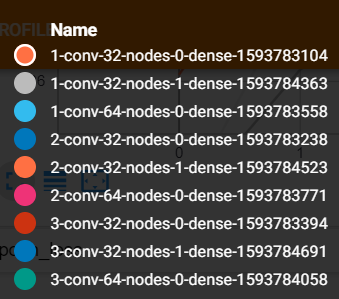

In [3]:
from IPython.display import Image, display

display(Image(filename="F:\\Tensorboard_images\\Legend.png"))

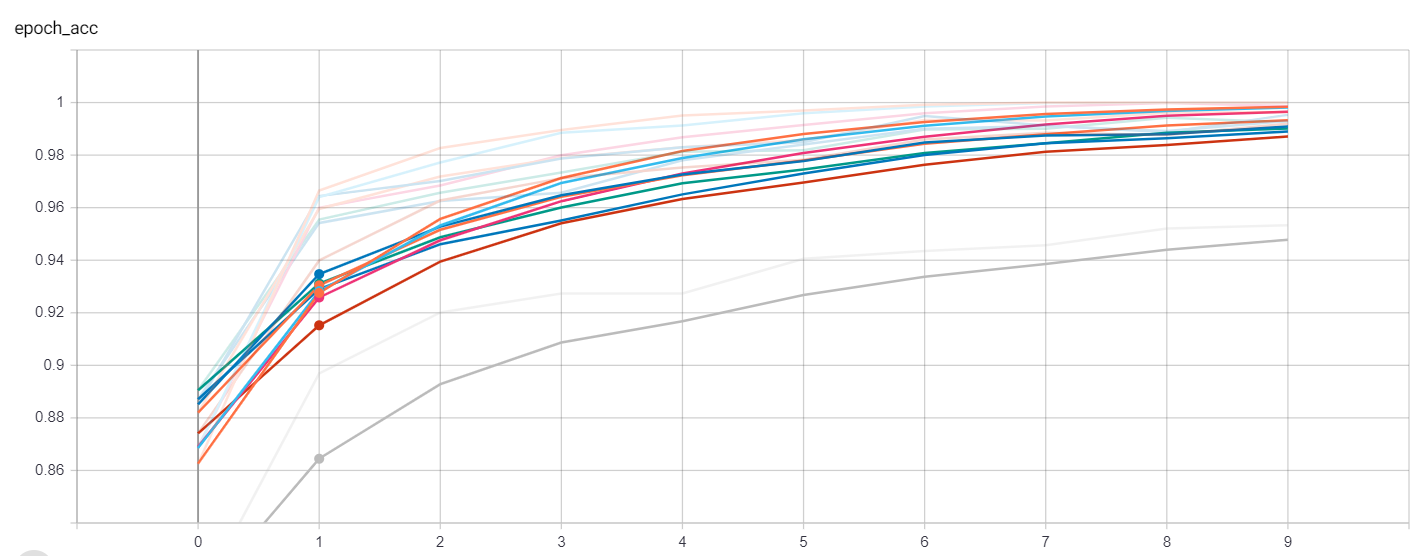

In [4]:
display(Image(filename="F:\\Tensorboard_images\\1.png"))

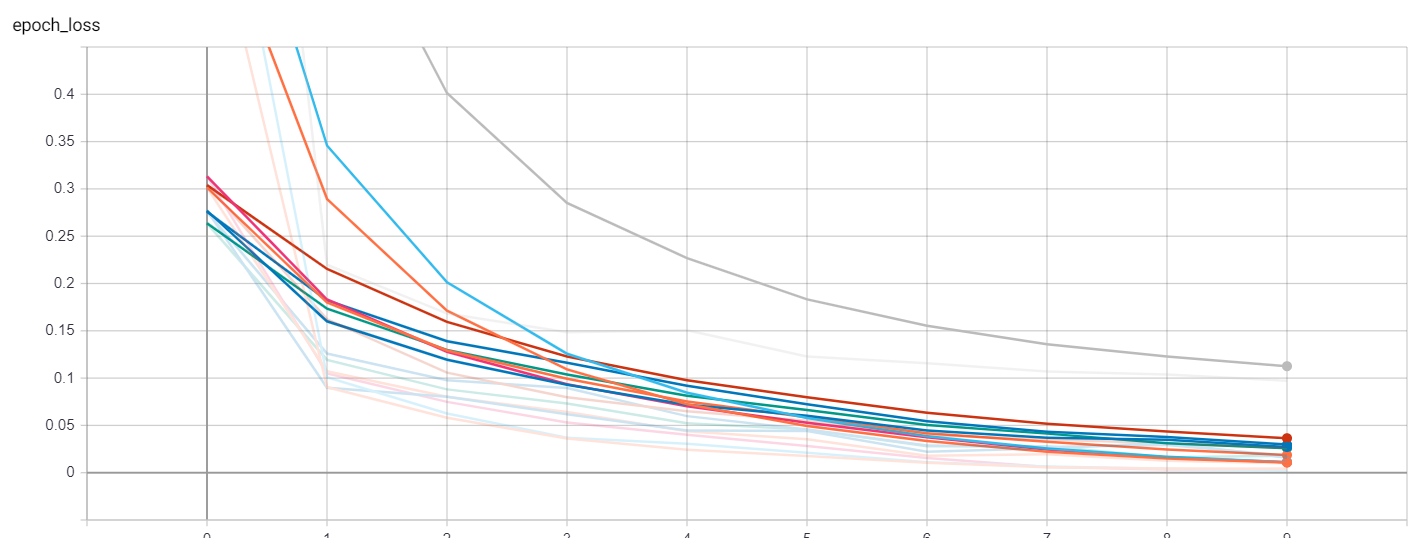

In [5]:
display(Image(filename="F:\\Tensorboard_images\\2.png"))

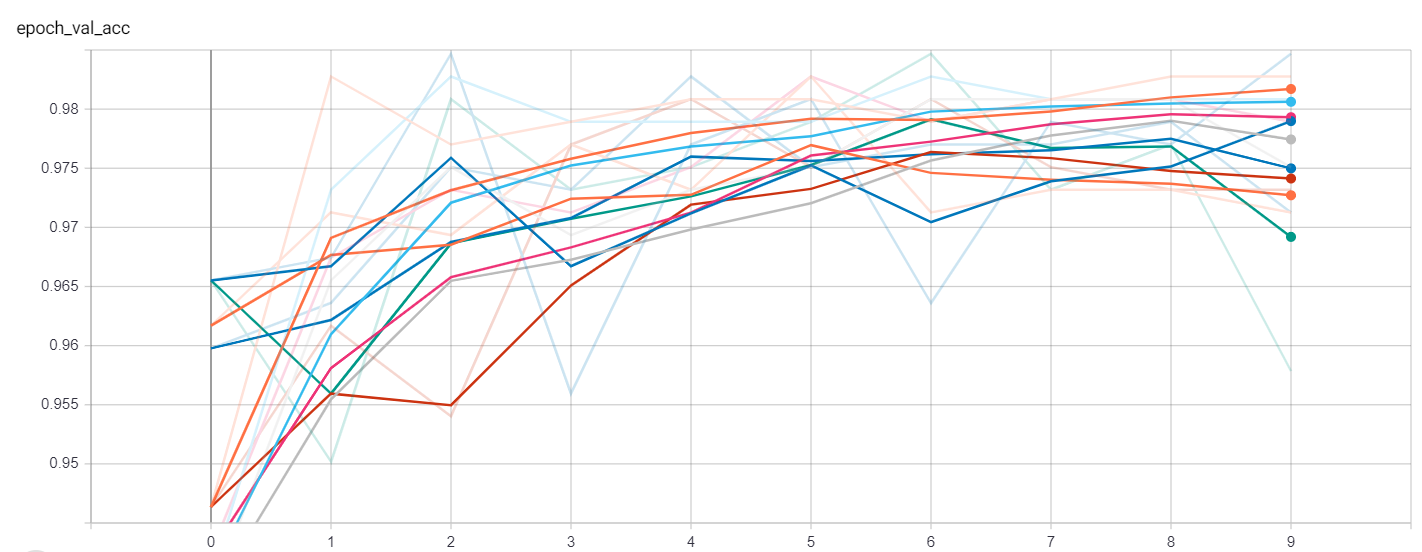

In [6]:
display(Image(filename="F:\\Tensorboard_images\\3.png"))

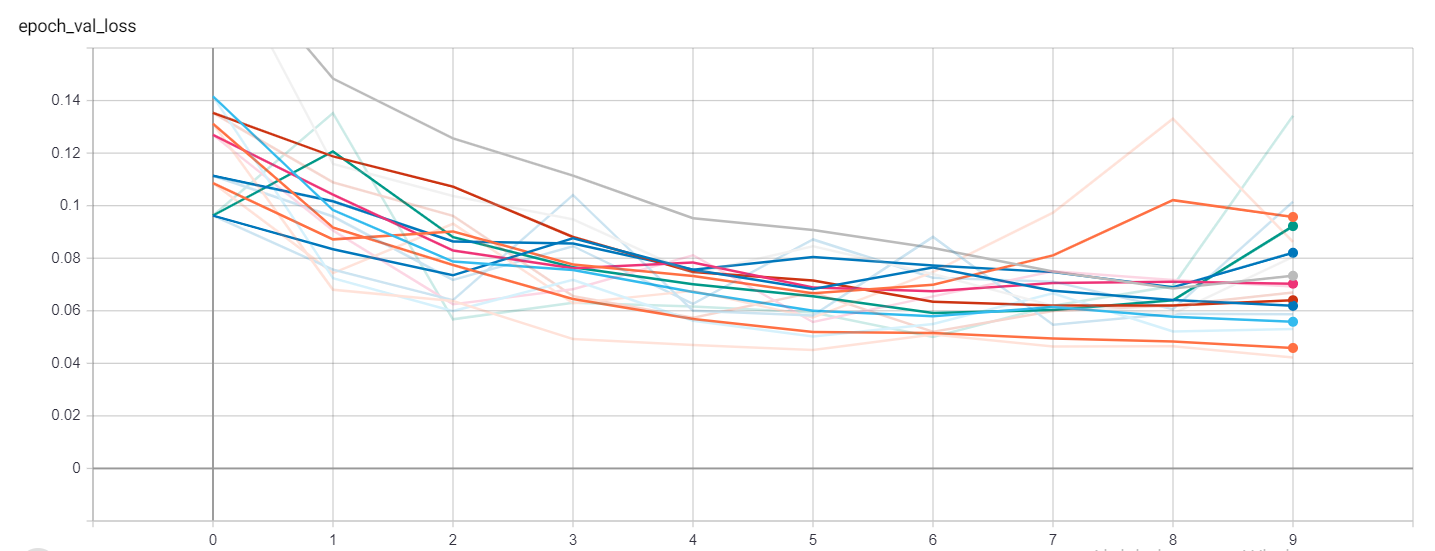

In [7]:
display(Image(filename="F:\\Tensorboard_images\\4.png"))

In [20]:
test_performance

[]

In [38]:

test_performance = np.array(test_performance)

In [39]:
test_labels = []

In [40]:
test_accuracy = []


In [24]:
for i,j in test_performance:
    test_labels.append(i)
    test_accuracy.append(float(j))

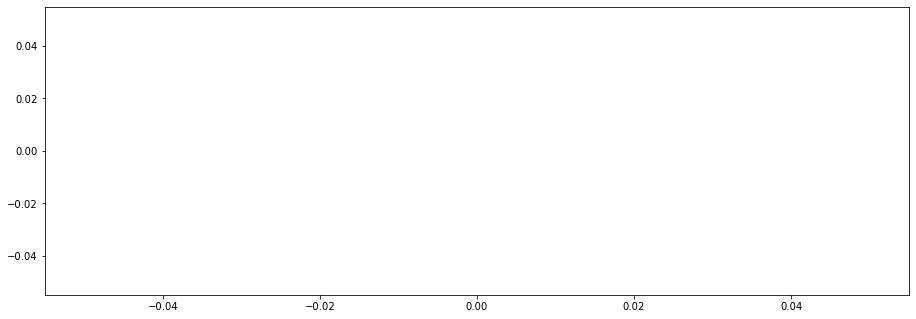

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(test_labels, test_accuracy)
plt.show()

In [ ]:
model = Sequential()


model.add(Conv2D((32), (3,3))) 
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten()) 
model.add(Dense(1)) 
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"]) 

# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=11, verbose=1, mode='auto')

# Fits model over 3333 iterations with 'earlystopper' callback, and assigns it to history
model.fit(X, Y, epochs = 100, validation_split = 0.1,shuffle = True, verbose = 1, 
                    callbacks = [earlystopper])


In [66]:
y_test_pred = model.predict(X_test)



In [46]:
y_test_pred

array([[1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [2.78896033e-38],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],


In [ ]:
import sklearn

In [67]:
confusion = sklearn.metrics.confusion_matrix(y_true=Y_test.astype("int32"), y_pred=y_test_pred.astype("int32"))

In [ ]:
print("      No Pneumonia :  Pneumonia")
print("True       " + str(confusion[0][0]) + "           " + str(confusion[1][1]))
print("False      " + str(confusion[1][0]) + "            " + str(confusion[0][1]))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(Y_test, y_test_pred.astype(int))))

In [ ]:
len(X_test)

In [ ]:
X_test = np.load("X_pneumo_test.npy")

In [ ]:
Y_test = np.load("Y_pneumo_test.npy")

In [ ]:

y_test_pred = model.predict(X_test)

In [ ]:
#print("The Accuracy score on the Training set is:\t{:0.3f}".format(accuracy_score(Y, y_train_pred.astype(int))))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(Y_test, y_test_pred.astype(int))))

In [ ]:
len(X_test)


In [ ]:
imagos = []

imagos.append(cv2.resize(cv2.imread("0.jpg", cv2.IMREAD_GRAYSCALE), (300,300)))
imagos.append(cv2.resize(cv2.imread("1.jpg", cv2.IMREAD_GRAYSCALE), (300,300)))
imagos.append(cv2.resize(cv2.imread("2.jpg", cv2.IMREAD_GRAYSCALE), (300,300)))


In [ ]:
imagos = np.array(imagos)

In [ ]:
imagos = imagos/255

In [ ]:
imagos = np.array(imagos).reshape(-1, 300, 300,1)

In [ ]:
imagos.shape



In [ ]:
X_test.shape

In [ ]:
bolest = model.predict(imagos)

In [ ]:
bolest

model = Sequential()

model.add(Conv2D((64), (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D((64), (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten())
model.add(Dense(48))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])
model.fit(X,Y, batch_size=40, validation_split=0.1, epochs=2)





The Accuracy score on the Test set is:	0.803
